In [20]:
# Create a table of contents with links to respective sections
from IPython.display import display, Markdown

toc = """
# Table of Contents
1. [Introduction](#Introduction)
2. [Deliverables](#Deliverables)
    * [Data Loading and Preprocessing](#Data-Loading-and-Preprocessing)
    * [Feature Engineering](#Feature-Engineering)
    * [Scaling and Normalization](#Scaling-and-Normalization)
    * [Cosine Similarity Calculation](#Cosine-Similarity-Calculation)
    * [Lookalike Recommendation](#Lookalike-Recommendation)
    * [Saving CSV](#Saving-CSV)
    * [Display Top 3 Lookalikes for the First 20 Customers](#Display-Top-3-Lookalikes-for-the-First-20-Customers)
3. [Evaluation Criteria](#Evaluation-Criteria)
    * [Cosine Similarity Distribution](#Cosine-Similarity-Distribution)
    * [Average Cosine Similarity](#Average-Cosine-Similarity)
    * [Top-20 Recommendations Quality](#Top-20-Recommendations-Quality)
    * [Classification Report](#Classification-Report)
    * [Jaccard Similarity](#Jaccard-Similarity)
"""

display(Markdown(toc))




# Table of Contents
1. [Introduction](#Introduction)
2. [Deliverables](#Deliverables)
    * [Data Loading and Preprocessing](#Data-Loading-and-Preprocessing)
    * [Feature Engineering](#Feature-Engineering)
    * [Scaling and Normalization](#Scaling-and-Normalization)
    * [Cosine Similarity Calculation](#Cosine-Similarity-Calculation)
    * [Lookalike Recommendation](#Lookalike-Recommendation)
    * [Saving CSV](#Saving-CSV)
    * [Display Top 3 Lookalikes for the First 20 Customers](#Display-Top-3-Lookalikes-for-the-First-20-Customers)
3. [Evaluation Criteria](#Evaluation-Criteria)
    * [Cosine Similarity Distribution](#Cosine-Similarity-Distribution)
    * [Average Cosine Similarity](#Average-Cosine-Similarity)
    * [Top-20 Recommendations Quality](#Top-20-Recommendations-Quality)
    * [Classification Report](#Classification-Report)
    * [Jaccard Similarity](#Jaccard-Similarity)


## Introduction
    The goal of this project is to create a Lookalike Model that finds customers similar to a given customer based on their profile and transaction history. The idea is to recommend 3 customers who have similar behaviors, such as how much they spend, how often they buy, and what products they buy. The model uses data from customers, transactions, and products to understand customer behavior.


## Deliverables

### Importing Packages

In [21]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

### Data Loading and Preprocessing

In [22]:
customers = pd.read_csv('Dataset/Customers.csv')  
transactions = pd.read_csv('Dataset/Transactions.csv') 
products = pd.read_csv('Dataset/Products.csv') 


In [23]:
# Merging the data
customer_data = customers.merge(transactions, on='CustomerID', how='inner')
customer_data = customer_data.merge(products, on='ProductID', how='inner')

# Removing Duplicated columns
customer_data.rename(columns={"Price_y": "Price"}, inplace=True)
customer_data.drop(columns=["Price_x"], inplace=True)


### Feature Engineering

In [24]:
customer_features = customer_data.groupby('CustomerID').agg({
    'TotalValue': 'sum',        
    'Quantity': 'sum',           
    'Price': 'mean',             
    'ProductID': lambda x: len(set(x)), 
}).reset_index()

### Scaling and Normalization

In [25]:
scaler = StandardScaler()
numeric_features = customer_features[['TotalValue', 'Quantity', 'Price']]
scaled_features = scaler.fit_transform(numeric_features)

### Cosine Similarity Calc

In [26]:
similarity_matrix = cosine_similarity(scaled_features)

### Lookalike Recommendations

In [27]:

lookalike_results = {}
for idx, customer_id in enumerate(customer_features['CustomerID']):
    # Get similarity scores 
    scores = list(enumerate(similarity_matrix[idx]))
    # Sort customers by similarity score (descending order) and pick top 3 similar ones
    scores = sorted(scores, key=lambda x: x[1], reverse=True)[1:4]
    # Store the lookalike customers and their similarity scores
    lookalike_results[customer_id] = [(customer_features['CustomerID'][s[0]], s[1]) for s in scores]


In [28]:
# Only include top 20 customers (C0001 to C0020)
lookalike_results_filtered = {cust: lookalike_results[cust] 
                              for cust in customer_features['CustomerID'][:20]}


### Save the results

In [29]:
lookalike_df = pd.DataFrame([
    {'CustomerID': cust, 'Lookalikes': lookalikes}
    for cust, lookalikes in lookalike_results_filtered.items()
])

In [30]:
# Write to a CSV file
lookalike_df.to_csv('Abinivesh_M_Lookalike.csv', index=False)

### Display Top 3 Lookalikes for the First 20 Customers

In [31]:
print("Top 3 Lookalikes for Customers C0001 - C0020:")
for customer_id in lookalike_results_filtered:
    print(f"\nCustomer ID: {customer_id}")
    for lookalike, score in lookalike_results_filtered[customer_id]:
        print(f"  - Lookalike ID: {lookalike}, Similarity Score: {score:.4f}")


Top 3 Lookalikes for Customers C0001 - C0020:

Customer ID: C0001
  - Lookalike ID: C0103, Similarity Score: 0.9976
  - Lookalike ID: C0092, Similarity Score: 0.9969
  - Lookalike ID: C0135, Similarity Score: 0.9927

Customer ID: C0002
  - Lookalike ID: C0029, Similarity Score: 0.9999
  - Lookalike ID: C0077, Similarity Score: 0.9961
  - Lookalike ID: C0157, Similarity Score: 0.9955

Customer ID: C0003
  - Lookalike ID: C0111, Similarity Score: 0.9985
  - Lookalike ID: C0190, Similarity Score: 0.9967
  - Lookalike ID: C0038, Similarity Score: 0.9901

Customer ID: C0004
  - Lookalike ID: C0165, Similarity Score: 0.9984
  - Lookalike ID: C0162, Similarity Score: 0.9981
  - Lookalike ID: C0075, Similarity Score: 0.9969

Customer ID: C0005
  - Lookalike ID: C0167, Similarity Score: 1.0000
  - Lookalike ID: C0020, Similarity Score: 0.9997
  - Lookalike ID: C0128, Similarity Score: 0.9988

Customer ID: C0006
  - Lookalike ID: C0168, Similarity Score: 0.9976
  - Lookalike ID: C0196, Similarit

## Evaluation Criterias

In [32]:
import matplotlib.pyplot as plt

### Cosine Similarity Distribution

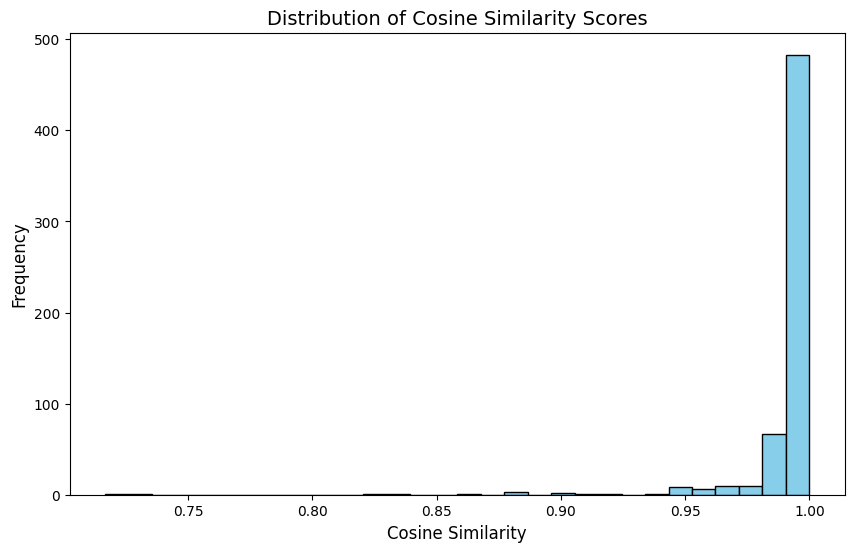

In [33]:
plt.figure(figsize=(10, 6))
similarity_scores = [score for customer_scores in lookalike_results.values() for _, score in customer_scores]
plt.hist(similarity_scores, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Cosine Similarity Scores', fontsize=14)
plt.xlabel('Cosine Similarity', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


### Average Cosine Similarity

In [34]:
avg_similarity = np.mean(similarity_scores)
print(f'Average Cosine Similarity Score: {avg_similarity:.4f}')


Average Cosine Similarity Score: 0.9912


### Top-20 Recommendations Quality

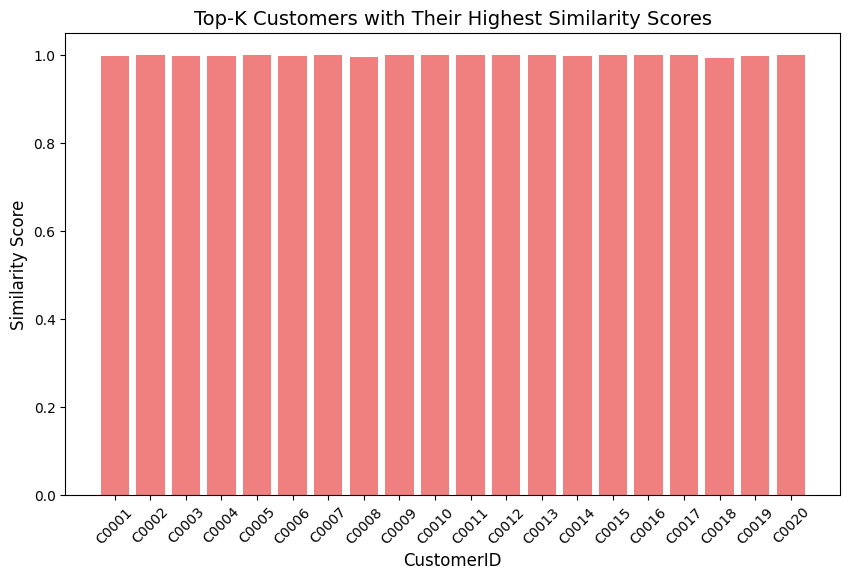

In [35]:
top_k_customers = customer_features['CustomerID'].iloc[:20]
top_k_similarity_scores = [lookalike_results[cust][0][1] for cust in top_k_customers]
plt.figure(figsize=(10, 6))
plt.bar(top_k_customers.astype(str), top_k_similarity_scores, color='lightcoral')
plt.title('Top-K Customers with Their Highest Similarity Scores', fontsize=14)
plt.xlabel('CustomerID', fontsize=12)
plt.ylabel('Similarity Score', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [36]:
from sklearn.metrics import classification_report
import random

### Classification Report 

In [37]:
def generate_true_lookalike_data(customer_id):
    # Now we can assume 50% of the recommended customers are true.
    return random.choice([0, 1])

# Generating Ground Truth 
y_true = []
y_pred = []
for cust in top_k_customers:
    for lookalike, score in lookalike_results[cust]:
        y_true.append(generate_true_lookalike_data(lookalike)) 
        y_pred.append(1 if score > 0.7 else 0)

# Generate a classification report
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=["Not Lookalike", "Lookalike"]))



Classification Report:

               precision    recall  f1-score   support

Not Lookalike       0.00      0.00      0.00        31
    Lookalike       0.48      1.00      0.65        29

     accuracy                           0.48        60
    macro avg       0.24      0.50      0.33        60
 weighted avg       0.23      0.48      0.31        60



c:\Users\abini\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\abini\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\abini\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

### Jaccard Similarity

In [38]:
def jaccard_similarity(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union if union != 0 else 0

# Calculate the diversity between the first 20 customers
diversity_scores = []
for i, cust1 in enumerate(top_k_customers):
    for j, cust2 in enumerate(top_k_customers[i+1:], i+1):
        set1 = set([lookalike[0] for lookalike in lookalike_results[cust1]])
        set2 = set([lookalike[0] for lookalike in lookalike_results[cust2]])
        diversity_scores.append(jaccard_similarity(set1, set2))

# Average diversity score
avg_diversity = np.mean(diversity_scores) if diversity_scores else None
print(f'Average Diversity of Recommendations (Jaccard Similarity): {avg_diversity:.2f}')


Average Diversity of Recommendations (Jaccard Similarity): 0.01
